In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv",header=0,names=['Label','Review','Description'])

In [4]:
df

,Label,Review,Description
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...


In [5]:
df = df.reindex(columns=['Review','Description','Label'])
df

,Review,Description,Label
0,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,2
1,Amazing!,This soundtrack is my favorite music of all ti...,2
2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,2
3,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",2
4,an absolute masterpiece,I am quite sure any of you actually taking the...,2
...,...,...,...
3599994,Don't do it!!,The high chair looks great when it first comes...,1
3599995,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...,1
3599996,"compact, but hard to clean","We have a small house, and really wanted two o...",1
3599997,what is it saying?,not sure what this book is supposed to be. It ...,1


In [6]:
df['Label'].value_counts()

1    1800000
2    1799999
Name: Label, dtype: int64

* no class imbalance

In [7]:
for i in df.head().itertuples():
    print(i)

Pandas(Index=0, Review='The best soundtrack ever to anything.', Description="I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.", Label=2)
Pandas(Index=1, Review='Amazing!', Description='This soundtrack is my favorite music of all time, hands down. The intense sadness of "Prisoners of Fate" (which means all the more if you\'ve played the game) and the hope in "A Distant Promise" and "Girl who Stole the Star" have been an important inspiration to me personally throughout my teen years. The higher energy tracks like "Chrono Cross ~ Time\'s Scar~", "Time of the Dreamwatch", an

In [8]:
for i in df.tail().itertuples():
    print(i)

Pandas(Index=3599994, Review="Don't do it!!", Description='The high chair looks great when it first comes out of the box but it is all down hill after that. It is impossible to keep clean. The finish is flaking off, after less than 6 months of use. It is not worth the struggle to keep up. If you already have it, call the customer service number and order a second chair pad. It is only $12 and does help to be able to switch out when one is in the wash.', Label=1)
Pandas(Index=3599995, Review='Looks nice, low functionality', Description="I have used this highchair for 2 kids now and finally decided to sell it because I did not like it. It's a beautiful chair and looks great in the kitchen. It's much nicer looking than the 'plastic' ones you see. What I don't like about this chair is the day-to-day functionality of it. It does not adjust, at all. As the baby gets older, I want a chair that tilts, adjusts, etc-- and this does not do that. Also, it is very heavy and hard to move; it does no

In [2]:
# Data Analysis libraries
import numpy as np

import string
import os


# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

# NLP Modules
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer


# SkLearn for ML Model
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [3]:
df = pd.read_csv("final_file.csv")

In [4]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df

,Review,Label
0,the best soundtrack ever to anything.i'm readi...,2
1,amazing!this soundtrack is my favorite music o...,2
2,excellent soundtracki truly like this soundtra...,2
3,"remember, pull your jaw off the floor after he...",2
4,an absolute masterpiecei am quite sure any of ...,2
...,...,...
3599994,don't do it!!the high chair looks great when i...,1
3599995,"looks nice, low functionalityi have used this ...",1
3599996,"compact, but hard to cleanwe have a small hous...",1
3599997,what is it saying?not sure what this book is s...,1


In [9]:
df.describe(include='all')

,Review,Label
count,3599999,3599999.0
unique,3599661,NaN
top,fram is trashfram is trash. i have removed sev...,NaN
freq,4,NaN
mean,NaN,1.5
std,NaN,0.5
min,NaN,1.0
25%,NaN,1.0
50%,NaN,1.0
75%,NaN,2.0


In [15]:
df.isnull().sum()

Review         0
Description    0
Label          0
dtype: int64

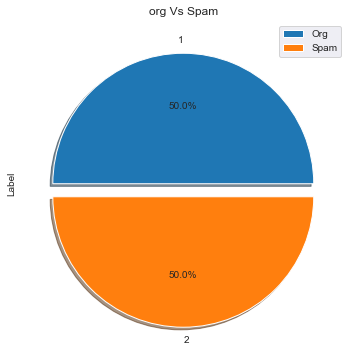

In [11]:
df['Label'].value_counts().plot(kind = 'pie',figsize = (6,6), explode = [0,0.1], shadow = True, autopct = '%1.1f%%')
plt.title('org Vs Spam')
plt.legend(['Org','Spam'])
plt.show()

* no class imbalance

In [18]:
# # punctuations check
# # remove stopwords. 



# def preprocess_text(mess):
#     """
#     Takes a message string and returns the clean text
#     1. Removing punctuation
#     2. Remove stop words. 
#     3. Return the clean message.
#     """
#     nopunc = [char for char in mess if char not in string.punctuation]
#     nopunc = " ".join(nopunc)
#     nopunc = nopunc.lower()
    
#     ## stopword -> input is nopunc
#     nostop = [word for word in nopunc.split(" ") if word.lower() not in stopwords.words('english')]
    
#     return nostop

In [19]:
# spam_words = preprocess_text(spams_review) 

In [20]:
# len(spam_words)

In [21]:
# spam_words_descp = df['Description'].apply(lambda x:preprocess_text(x))

In [20]:
df["Review"] = df.apply(lambda x: x["Review"]+" "+x["Description"],axis=1)

In [21]:
df

,Review,Description,Label
0,The best soundtrack ever to anything.I'm readi...,I'm reading a lot of reviews saying that this ...,2
1,Amazing!This soundtrack is my favorite music o...,This soundtrack is my favorite music of all ti...,2
2,Excellent SoundtrackI truly like this soundtra...,I truly like this soundtrack and I enjoy video...,2
3,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",2
4,an absolute masterpieceI am quite sure any of ...,I am quite sure any of you actually taking the...,2
...,...,...,...
3599994,Don't do it!!The high chair looks great when i...,The high chair looks great when it first comes...,1
3599995,"Looks nice, low functionalityI have used this ...",I have used this highchair for 2 kids now and ...,1
3599996,"compact, but hard to cleanWe have a small hous...","We have a small house, and really wanted two o...",1
3599997,what is it saying?not sure what this book is s...,not sure what this book is supposed to be. It ...,1


In [22]:
df.drop(['Description'],axis=1, inplace=True)

In [23]:
df

,Review,Label
0,The best soundtrack ever to anything.I'm readi...,2
1,Amazing!This soundtrack is my favorite music o...,2
2,Excellent SoundtrackI truly like this soundtra...,2
3,"Remember, Pull Your Jaw Off The Floor After He...",2
4,an absolute masterpieceI am quite sure any of ...,2
...,...,...
3599994,Don't do it!!The high chair looks great when i...,1
3599995,"Looks nice, low functionalityI have used this ...",1
3599996,"compact, but hard to cleanWe have a small hous...",1
3599997,what is it saying?not sure what this book is s...,1


In [24]:
df['Review'] = df['Review'].apply(lambda x: x.lower())

In [25]:
df

,Review,Label
0,the best soundtrack ever to anything.i'm readi...,2
1,amazing!this soundtrack is my favorite music o...,2
2,excellent soundtracki truly like this soundtra...,2
3,"remember, pull your jaw off the floor after he...",2
4,an absolute masterpiecei am quite sure any of ...,2
...,...,...
3599994,don't do it!!the high chair looks great when i...,1
3599995,"looks nice, low functionalityi have used this ...",1
3599996,"compact, but hard to cleanwe have a small hous...",1
3599997,what is it saying?not sure what this book is s...,1


In [26]:
# df1 = df[:50]

In [18]:
df

,Review,Label,shifted_review
0,the best soundtrack ever to anything.i'm readi...,2,NaN
1,amazing!this soundtrack is my favorite music o...,2,the best soundtrack ever to anything.i'm readi...
2,excellent soundtracki truly like this soundtra...,2,amazing!this soundtrack is my favorite music o...
3,"remember, pull your jaw off the floor after he...",2,excellent soundtracki truly like this soundtra...
4,an absolute masterpiecei am quite sure any of ...,2,"remember, pull your jaw off the floor after he..."
...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,too simplisticwhile mr. harrison makes some ex...
3599995,"looks nice, low functionalityi have used this ...",1,don't do it!!the high chair looks great when i...
3599996,"compact, but hard to cleanwe have a small hous...",1,"looks nice, low functionalityi have used this ..."
3599997,what is it saying?not sure what this book is s...,1,"compact, but hard to cleanwe have a small hous..."


In [6]:
import math
from collections import Counter
def get_cosine(text1, text2):
    
    word1 = text1.split()
    word2 = text2.split()
    
    vec1 = Counter(word1)
    vec2 = Counter(word2)
    
    common = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in common])

    sum1 = sum([vec1[x]**2 for x in vec1.keys()]) 
    sum2 = sum([vec2[x]**2 for x in vec2.keys()]) 
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
   
    if not denominator:
        return 0.0 
    else:
        return float(numerator) / denominator

# def text_to_vector(text): 
#     words = text.split() 
#     return Counter(words)


#text1 = 'This is an article on analytics vidhya' 
#text2 = 'article on analytics vidhya is about natural language processing'

#vector1 = text_to_vector(text1) 
#vector2 = text_to_vector(text2) 
#cosine = get_cosine(text1, text2)

In [7]:
# def jaccard_similarity(x,y):
    
#     """ returns the jaccard similarity between two lists """
    
#     intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    
#     union_cardinality = len(set.union(*[set(x), set(y)]))
    
#     return intersection_cardinality/float(union_cardinality)

In [8]:
# # sentences = ["The bottle is empty",
# # "There is nothing in the bottle"]
# sentences = [sent.lower().split(" ") for sent in sentences]
# # jaccard_similarity(sentences[0], sentences[1])

In [9]:
# def cos_similarity(x,y):
#     """ return cosine similarity between two lists """

#     numerator = sum(a*b for a,b in zip(x,y))
    
#     denominator = squared_sum(x)*squared_sum(y)
    
#     return round(numerator/float(denominator),3)

In [10]:
df['shifted_review'] = df['Review'].shift(1)
df

,Review,Label,shifted_review
0,the best soundtrack ever to anything.i'm readi...,2,NaN
1,amazing!this soundtrack is my favorite music o...,2,the best soundtrack ever to anything.i'm readi...
2,excellent soundtracki truly like this soundtra...,2,amazing!this soundtrack is my favorite music o...
3,"remember, pull your jaw off the floor after he...",2,excellent soundtracki truly like this soundtra...
4,an absolute masterpiecei am quite sure any of ...,2,"remember, pull your jaw off the floor after he..."
...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,too simplisticwhile mr. harrison makes some ex...
3599995,"looks nice, low functionalityi have used this ...",1,don't do it!!the high chair looks great when i...
3599996,"compact, but hard to cleanwe have a small hous...",1,"looks nice, low functionalityi have used this ..."
3599997,what is it saying?not sure what this book is s...,1,"compact, but hard to cleanwe have a small hous..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599999 entries, 0 to 3599998
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Review          object
 1   Label           int64 
 2   shifted_review  object
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [12]:
df['sim_score'] = df.apply(lambda x: get_cosine(x['Review'], str(x['shifted_review'])), axis=1)

In [13]:
df

,Review,Label,shifted_review,sim_score
0,the best soundtrack ever to anything.i'm readi...,2,NaN,0.000000
1,amazing!this soundtrack is my favorite music o...,2,the best soundtrack ever to anything.i'm readi...,0.457450
2,excellent soundtracki truly like this soundtra...,2,amazing!this soundtrack is my favorite music o...,0.536652
3,"remember, pull your jaw off the floor after he...",2,excellent soundtracki truly like this soundtra...,0.392120
4,an absolute masterpiecei am quite sure any of ...,2,"remember, pull your jaw off the floor after he...",0.502954
...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,too simplisticwhile mr. harrison makes some ex...,0.309465
3599995,"looks nice, low functionalityi have used this ...",1,don't do it!!the high chair looks great when i...,0.567870
3599996,"compact, but hard to cleanwe have a small hous...",1,"looks nice, low functionalityi have used this ...",0.585350
3599997,what is it saying?not sure what this book is s...,1,"compact, but hard to cleanwe have a small hous...",0.468018


In [14]:
df.drop(columns=['shifted_review'],axis=1,inplace=True)

In [15]:
df

,Review,Label,sim_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000
1,amazing!this soundtrack is my favorite music o...,2,0.457450
2,excellent soundtracki truly like this soundtra...,2,0.536652
3,"remember, pull your jaw off the floor after he...",2,0.392120
4,an absolute masterpiecei am quite sure any of ...,2,0.502954
...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465
3599995,"looks nice, low functionalityi have used this ...",1,0.567870
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350
3599997,what is it saying?not sure what this book is s...,1,0.468018


In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import words

In [17]:
valid_words = set(words.words())

def calculate_validity(sentence):
    tokens = word_tokenize(sentence)
    valid_tokens = {token for token in tokens if token in valid_words}
    return len(valid_tokens) / len(tokens)


In [18]:
df['lex_val_score'] = df['Review'].apply(calculate_validity)

In [21]:
df.to_csv("final_file_2.csv",index=False)

In [22]:
def calculate_unique(sentence):
    tokens = word_tokenize(sentence)
    unique_tokens = set(tokens)
    return len(unique_tokens) / len(tokens)

In [23]:
df['lex_div_score'] = df['Review'].apply(calculate_unique)

In [24]:
df

,Review,Label,sim_score,lex_val_score,lex_div_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253
...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231


In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()

polarity = [sent.polarity_scores(i)['compound'] for i in df['Description']]
df['sentiment_score'] = polarity


KeyboardInterrupt: 

In [25]:
df

,Review,Label,sim_score,lex_val_score,lex_div_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253
...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231


In [47]:
df.to_csv("final_file.csv")

In [3]:
df1 = pd.read_csv("final_file.csv")

In [4]:
df1

,Unnamed: 0,Review,Description,Label,sim_score,lex_val_score,lex_div_score
0,0,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,2,0.245487,0.554455,0.712871
1,1,amazing!,this soundtrack is my favorite music of all ti...,2,0.000000,0.438272,0.611111
2,2,excellent soundtrack,i truly like this soundtrack and i enjoy video...,2,0.123299,0.394366,0.591549
3,3,"remember, pull your jaw off the floor after he...","if you've played the game, you know how divine...",2,0.254000,0.474227,0.670103
4,4,an absolute masterpiece,i am quite sure any of you actually taking the...,2,0.031357,0.436364,0.618182
...,...,...,...,...,...,...,...
3599994,3599994,don't do it!!,the high chair looks great when it first comes...,1,0.000000,0.576087,0.663043
3599995,3599995,"looks nice, low functionality",i have used this highchair for 2 kids now and ...,1,0.044108,0.458937,0.579710
3599996,3599996,"compact, but hard to clean","we have a small house, and really wanted two o...",1,0.145486,0.460317,0.587302
3599997,3599997,what is it saying?,not sure what this book is supposed to be. it ...,1,0.265165,0.536842,0.736842


In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['Review'].apply(lambda x: sent.polarity_scores(x)['compound'])

In [28]:
df

,Review,Label,sim_score,lex_val_score,lex_div_score,sentiment_score
0,the best soundtrack ever to anything.i'm readi...,2,0.000000,0.275362,0.357488,0.9869
1,amazing!this soundtrack is my favorite music o...,2,0.457450,0.217791,0.306748,0.9963
2,excellent soundtracki truly like this soundtra...,2,0.536652,0.196491,0.298246,0.9945
3,"remember, pull your jaw off the floor after he...",2,0.392120,0.264706,0.362745,0.9944
4,an absolute masterpiecei am quite sure any of ...,2,0.502954,0.219880,0.313253,0.9968
...,...,...,...,...,...,...
3599994,don't do it!!the high chair looks great when i...,1,0.309465,0.285714,0.343915,0.9794
3599995,"looks nice, low functionalityi have used this ...",1,0.567870,0.232057,0.294258,0.7105
3599996,"compact, but hard to cleanwe have a small hous...",1,0.585350,0.234987,0.300261,0.9817
3599997,what is it saying?not sure what this book is s...,1,0.468018,0.266667,0.369231,0.8689


In [12]:
df1.drop(['Unnamed: 0'],axis = 1)

,Review,Description,Label,sim_score,lex_val_score,lex_div_score,sentiment_score
0,the best soundtrack ever to anything.,i'm reading a lot of reviews saying that this ...,2,0.245487,0.554455,0.712871,0.8481
1,amazing!,this soundtrack is my favorite music of all ti...,2,0.000000,0.438272,0.611111,0.9854
2,excellent soundtrack,i truly like this soundtrack and i enjoy video...,2,0.123299,0.394366,0.591549,0.9753
3,"remember, pull your jaw off the floor after he...","if you've played the game, you know how divine...",2,0.254000,0.474227,0.670103,0.9781
4,an absolute masterpiece,i am quite sure any of you actually taking the...,2,0.031357,0.436364,0.618182,0.9873
...,...,...,...,...,...,...,...
3599994,don't do it!!,the high chair looks great when it first comes...,1,0.000000,0.576087,0.663043,0.8896
3599995,"looks nice, low functionality",i have used this highchair for 2 kids now and ...,1,0.044108,0.458937,0.579710,0.3829
3599996,"compact, but hard to clean","we have a small house, and really wanted two o...",1,0.145486,0.460317,0.587302,0.8767
3599997,what is it saying?,not sure what this book is supposed to be. it ...,1,0.265165,0.536842,0.736842,0.2819


In [29]:
df.to_csv("final_file_3.csv",index=False)